In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from scipy import stats
from scipy.stats import sem
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel,ttest_ind

In [49]:
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr
# import R's "base" package
lme4 = importr('lme4')
optimx = importr('optimx')
pbkrtest = importr('pbkrtest')
lmerTest = importr('lmerTest')
ggplot = importr('ggplot2')
dplyr = importr('dplyr')
sjplot = importr('sjPlot')
car = importr('car')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [50]:
home_dir = '/Users/dbao/google_drive_db'+'/road_construction/data/2022_online/'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

In [51]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID","condition"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()

In [52]:
# helper functions
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

# add p-value to figure
def text(p):
    if p == 0:
        axs.text((x1+x2)*.5, y+h,  r"$p = {:.1f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)
    elif p < 0.001:
        axs.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,1)), ha='center', va='bottom', color=col, fontsize = 8)
    elif p > 0.1:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.2f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)

    elif 0.01 < p < 0.1:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.3f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)
    else:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.4f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)

## action RT

In [53]:
def get_RT_cond(cond,RTtype):
    RT = puzzleID_order_data[puzzleID_order_data['condition']==cond]
    RT_sub = RT.groupby(['subjects'])[RTtype].mean()
    RT_sub_sem = sem(RT_sub)
    return [RT_sub,RT_sub_sem]

RT1_basic = get_RT_cond(0,'RT1')
RT1_undo = get_RT_cond(1,'RT1')

RTlater_basic = get_RT_cond(0,'RTlater')
RTlater_undo = get_RT_cond(1,'RTlater')

RTsubmit_basic = get_RT_cond(0,'RTsubmit')
RTsubmit_undo = get_RT_cond(1,'RTsubmit')

<IPython.core.display.Javascript object>


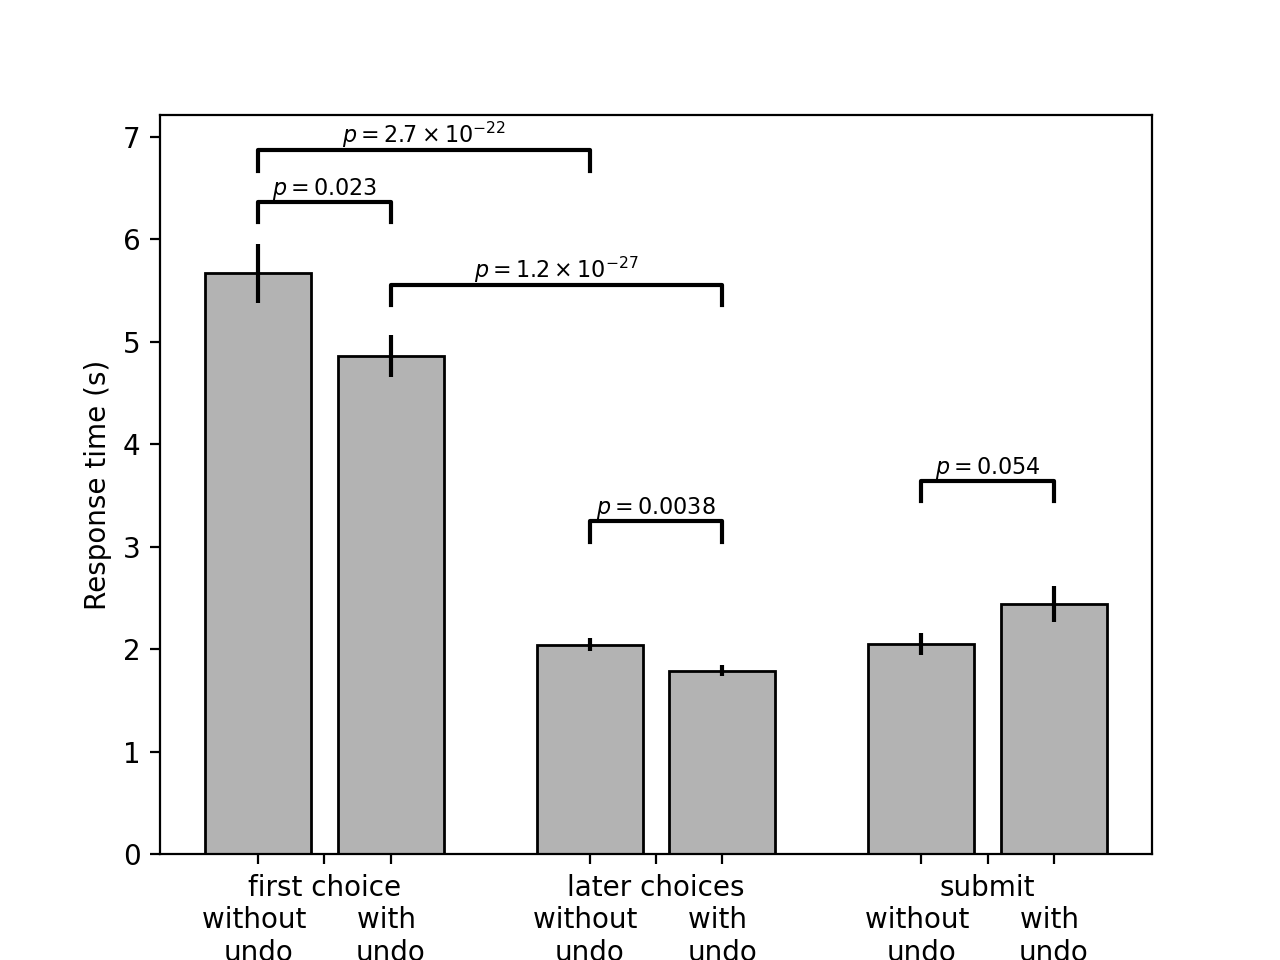

In [54]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.bar([1,2, 3.5,4.5, 6,7],
             
             [np.mean(RT1_basic[0]),np.mean(RT1_undo[0]),
              np.mean(RTlater_basic[0]),np.mean(RTlater_undo[0]),
              np.mean(RTsubmit_basic[0]),np.mean(RTsubmit_undo[0])],
             
             color = (.7,.7,.7), 
             
             edgecolor = 'k',
             
             yerr=[RT1_basic[1],RT1_undo[1],
              RTlater_basic[1],RTlater_undo[1],
              RTsubmit_basic[1],RTsubmit_undo[1]])

axs.set_xticks([1,1.5,2, 3.5,4,4.5, 6,6.5,7])
axs.set_xticklabels(labels = ['\nwithout \nundo','first choice','\nwith \nundo',
                              '\nwithout \nundo','later choices','\nwith \nundo', 
                              '\nwithout \nundo','submit','\nwith \nundo'])#,fontsize=18
axs.set_ylabel('Response time (s)')

# run 2-independent-sample t test
stat1, p1 = ttest_ind(RT1_basic[0], RT1_undo[0], equal_var=False)
x1, x2 = 1,2  
if bx[0].get_height() > bx[1].get_height():
    y, h, col = bx[0].get_height() + 0.5, 0.2, 'k'
else:
    y, h, col = bx[1].get_height() + 0.5, 0.2, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_ind(RTlater_basic[0],RTlater_undo[0],equal_var=False)

x1, x2 = 3.5,4.5
y, h, col = bx[2].get_height() + 1, 0.2, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_ind(RTsubmit_basic[0],RTsubmit_undo[0],equal_var=False)

x1, x2 = 6,7
y, h, col = bx[5].get_height() + 1, 0.2, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)

#--------------------------------------
stat4, p4 = ttest_ind(RT1_basic[0],RTlater_basic[0],equal_var=False)

x1, x2 = 1,3.5
y, h, col = bx[0].get_height() + 1, 0.2, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p4)

#--------------------------------------
stat5, p5 = ttest_ind(RT1_undo[0],RTlater_undo[0],equal_var=False)

x1, x2 = 2,4.5
y, h, col = bx[1].get_height() + 0.5, 0.2, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p5)

# fig.set_figheight(4)
# fig.set_figwidth(3)
plt.show()
fig.savefig(out_dir + 'conditional_undo_masError.pdf', dpi=600, bbox_inches='tight')

<IPython.core.display.Javascript object>


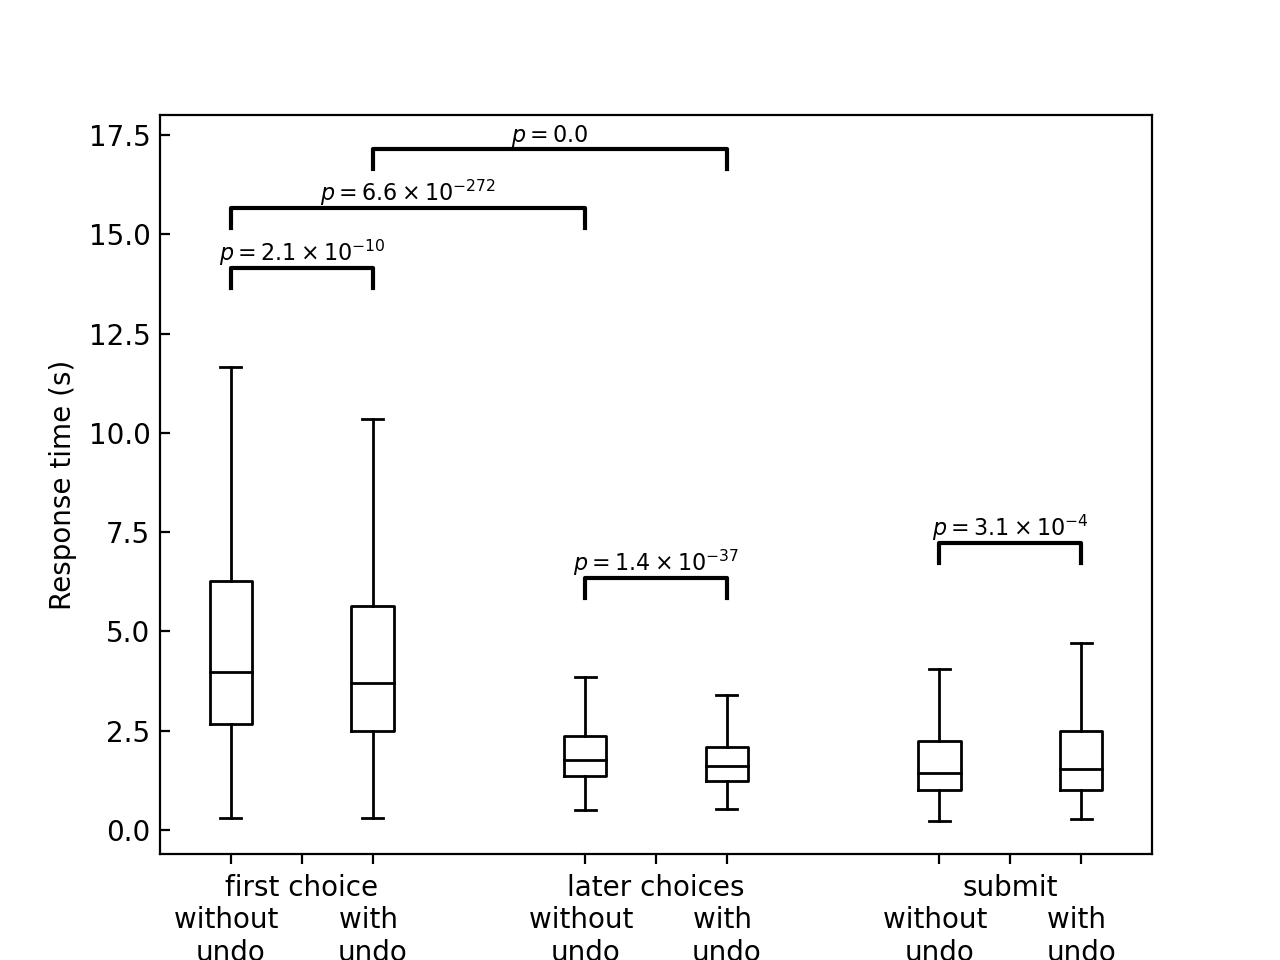

In [12]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

# plot with puzzle-level RT
bx = axs.boxplot([puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'],
    puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'],
    puzzleID_order_data[puzzleID_order_data['condition']==0]['RTsubmit'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTsubmit']],
   positions =[1,2,3.5,4.5,6,7],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k')) 
    
# run paired-sample t test
stat1, p1 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'])
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'])

x1, x2 = 3.5,4.5  
y, h, col = bx['caps'][5]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RTsubmit'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTsubmit'])

x1, x2 = 6,7 
y, h, col = bx['caps'][11]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)

#--------------------------------------
stat4, p4 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'], puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'])

x1, x2 = 1,3.5  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p4)
#--------------------------------------
stat5, p5 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'], puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'])

x1, x2 = 2,4.5  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 5, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p5)

#--------------------------------------
axs.set_xticks([1,1.5,2, 3.5,4,4.5, 6,6.5,7])
axs.set_xticklabels(labels = ['\nwithout \nundo','first choice','\nwith \nundo','\nwithout \nundo','later choices','\nwith \nundo', '\nwithout \nundo','submit','\nwith \nundo'])#,fontsize=18

axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
# fig.savefig(out_dir + 'action_RT.png', dpi=600, bbox_inches='tight')

## different types of undoing RT

In [55]:
def get_undoRT(index):
    RT = data_choice_level.loc[index,:]
    RT_sub = RT.groupby(['subjects'])['undoRT'].mean()/1000
    RT_sub_sem = sem(RT_sub)
    return [RT_sub,RT_sub_sem]

index_singleUndo = data_choice_level.index[(data_choice_level['firstUndo'] == 1)&(data_choice_level['lastUndo'] == 1)]
RT_singleUndo = get_undoRT(index_singleUndo)

index_firstUndo = data_choice_level.index[(data_choice_level['firstUndo'] == 1) &(data_choice_level['lastUndo'] != 1)]
RT_firstUndo = get_undoRT(index_firstUndo)

index_laterUndo = data_choice_level.index[(data_choice_level['firstUndo'] != 1) & (data_choice_level['undo'] == 1)]
RT_laterUndo = get_undoRT(index_laterUndo)

<IPython.core.display.Javascript object>


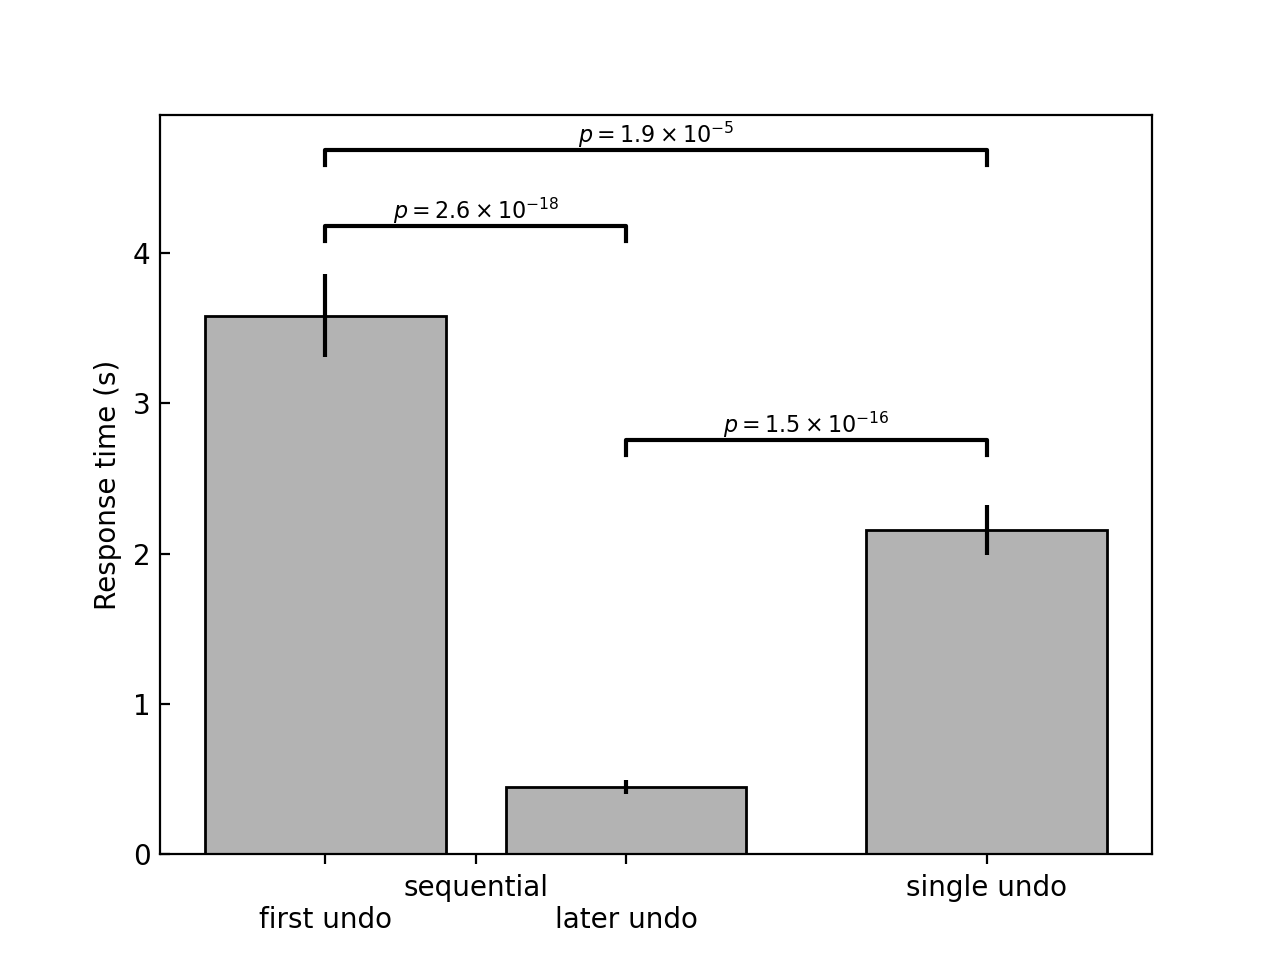

In [56]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.bar([1,2,3.2],
             
             [
              np.mean(RT_firstUndo[0]),
              np.mean(RT_laterUndo[0]),
              np.mean(RT_singleUndo[0])],
             
             color = (.7,.7,.7), 
             
             edgecolor = 'k',
             
             yerr=[RT_firstUndo[1],
                  RT_laterUndo[1],
                  RT_singleUndo[1]])

axs.set_xticks([1,1.5,2,3.2])
axs.set_xticklabels(labels = ['\nfirst undo','sequential','\nlater undo','single undo'])#,fontsize=18
axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

#--------------------------------------
# run 2-independent-sample t test
stat1, p1 = ttest_ind(RT_firstUndo[0],RT_laterUndo[0],equal_var=False)
x1, x2 = 1,2  
y, h, col = bx[0].get_height() + 0.5, 0.1, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_ind(RT_laterUndo[0],RT_singleUndo[0],equal_var=False)

x1, x2 = 2,3.2 
y, h, col = bx[2].get_height() + 0.5, 0.1, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_ind(RT_firstUndo[0],RT_singleUndo[0],equal_var=False)

x1, x2 = 1,3.2
y, h, col = bx[0].get_height() + 1, 0.1, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)
# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
# fig.savefig(out_dir + 'undo_RT.png', dpi=600, bbox_inches='tight')

<IPython.core.display.Javascript object>


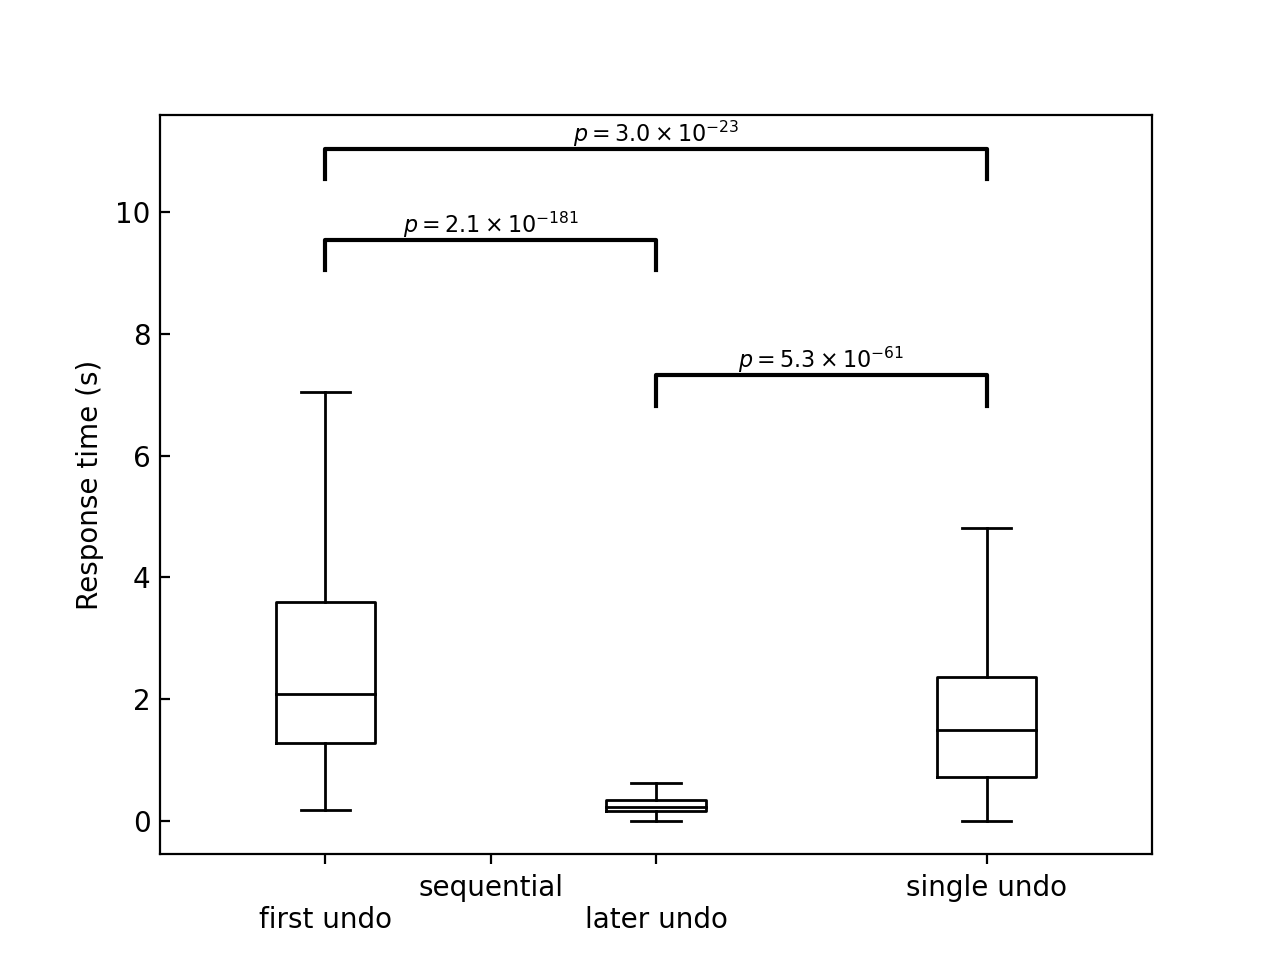

In [14]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.boxplot([RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000],
   positions =[1,2,3],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #

# run 2-independent-sample t test
stat1, p1 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,equal_var=False)
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_ind(RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 2,3 
y, h, col = bx['caps'][5]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 1,3
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)

#--------------------------------------
axs.set_xticks([1,1.5,2,3])
axs.set_xticklabels(labels = ['\nfirst undo','sequential','\nlater undo','single undo'])#,fontsize=18
axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'undo_RT.png', dpi=600, bbox_inches='tight')

## branching node RT

In [57]:
# the first visit of a branching node, and it is the start city
index_start = data_choice_level.index[(data_choice_level['branchingFirst'] == True)&(data_choice_level['RT'] == -1)]
RT_start = data_choice_level.loc[index_start + 1,:]
RT_start_sub = RT_start.groupby(['subjects'])['RT'].mean()/1000
RT_start_sub_sem = sem(RT_start_sub)

index_start_nobranch = data_choice_level.index[(data_choice_level['branching'] != True)&(data_choice_level['RT'] == -1)&(data_choice_level['condition']==1)]
RT_start_nobranch = data_choice_level.loc[index_start_nobranch + 1,:]
RT_start_nobranch_sub = RT_start_nobranch.groupby(['subjects'])['RT'].mean()/1000
RT_start_nobranch_sub_sem = sem(RT_start_nobranch_sub)

# the first visit of a branching node, and it is not a start city
index_notstart = data_choice_level.index[(data_choice_level['branchingFirst'] == True)&(data_choice_level['RT'] != -1)]
RT_notstart = data_choice_level.loc[index_notstart + 1,:]
RT_notstart_sub = RT_notstart.groupby(['subjects'])['RT'].mean()/1000
RT_notstart_sub_sem = sem(RT_notstart_sub)

index_notstart_nobranch = data_choice_level.index[(data_choice_level['branching'] != True)&(data_choice_level['RT'] != -1)&(data_choice_level['condition']==1)&(data_choice_level['submit']!=1)&(data_choice_level['undo']!=1)]
RT_notstart_nobranch = data_choice_level.loc[index_notstart_nobranch + 1,:]
RT_notstart_nobranch_sub = RT_notstart_nobranch.groupby(['subjects'])['RT'].mean()/1000
RT_notstart_nobranch_sub_sem = sem(RT_notstart_nobranch_sub)

<IPython.core.display.Javascript object>


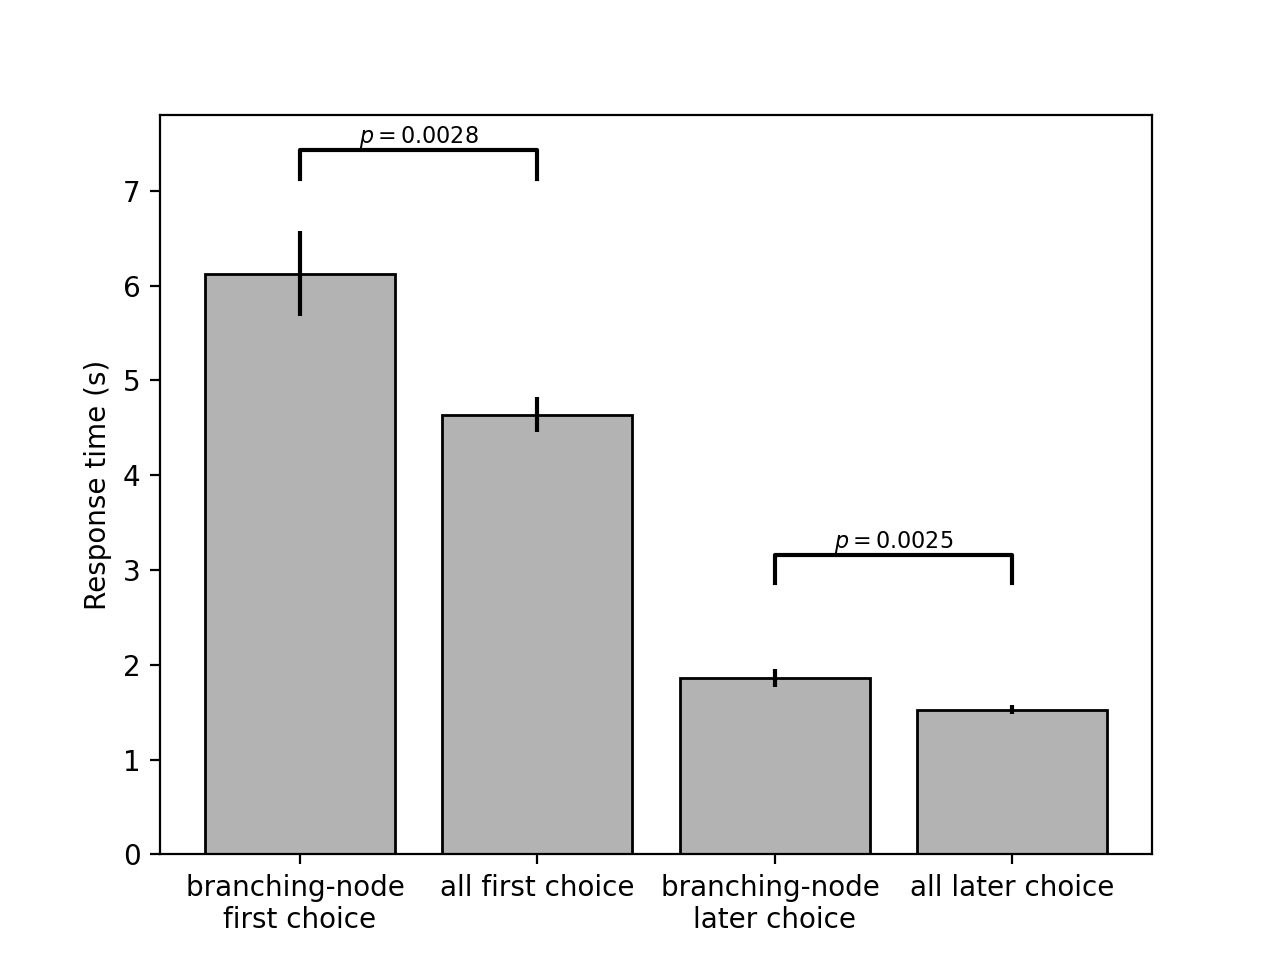

In [58]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
bx = axs.bar([1,2,3,4],
             [np.mean(RT_start_sub),np.mean(RT_start_nobranch_sub),
              np.mean(RT_notstart_sub),np.mean(RT_notstart_nobranch_sub)],
             color=(.7,.7,.7), edgecolor = 'k', 
             yerr=[RT_start_sub_sem,RT_start_nobranch_sub_sem,
                   RT_notstart_sub_sem,RT_notstart_nobranch_sub_sem])

axs.set_xticks([1,2,3,4])
# axs.set_yticks(np.linspace(0,0.16,5))
axs.set_xticklabels(labels = ['branching-node \nfirst choice','all first choice','branching-node \nlater choice','all later choice'])#,fontsize=18
axs.set_ylabel('Response time (s)')



# run 2-independent-sample t test
stat1, p1 = ttest_ind(RT_start_sub, RT_start_nobranch_sub,equal_var=False)
x1, x2 = 1,2  
if bx[0].get_height() > bx[1].get_height():
    y, h, col = bx[0].get_height() + 1, 0.3, 'k'
else:
    y, h, col = bx[1].get_height() + 1, 0.3, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_ind(RT_notstart_sub,RT_notstart_nobranch_sub,equal_var=False)

x1, x2 = 3,4 
y, h, col = bx[2].get_height() + 1, 0.3, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

# fig.set_figheight(4)
# fig.set_figwidth(3)
plt.show()
# fig.savefig(out_dir + 'conditional_undo_masError.pdf', dpi=600, bbox_inches='tight')

<IPython.core.display.Javascript object>


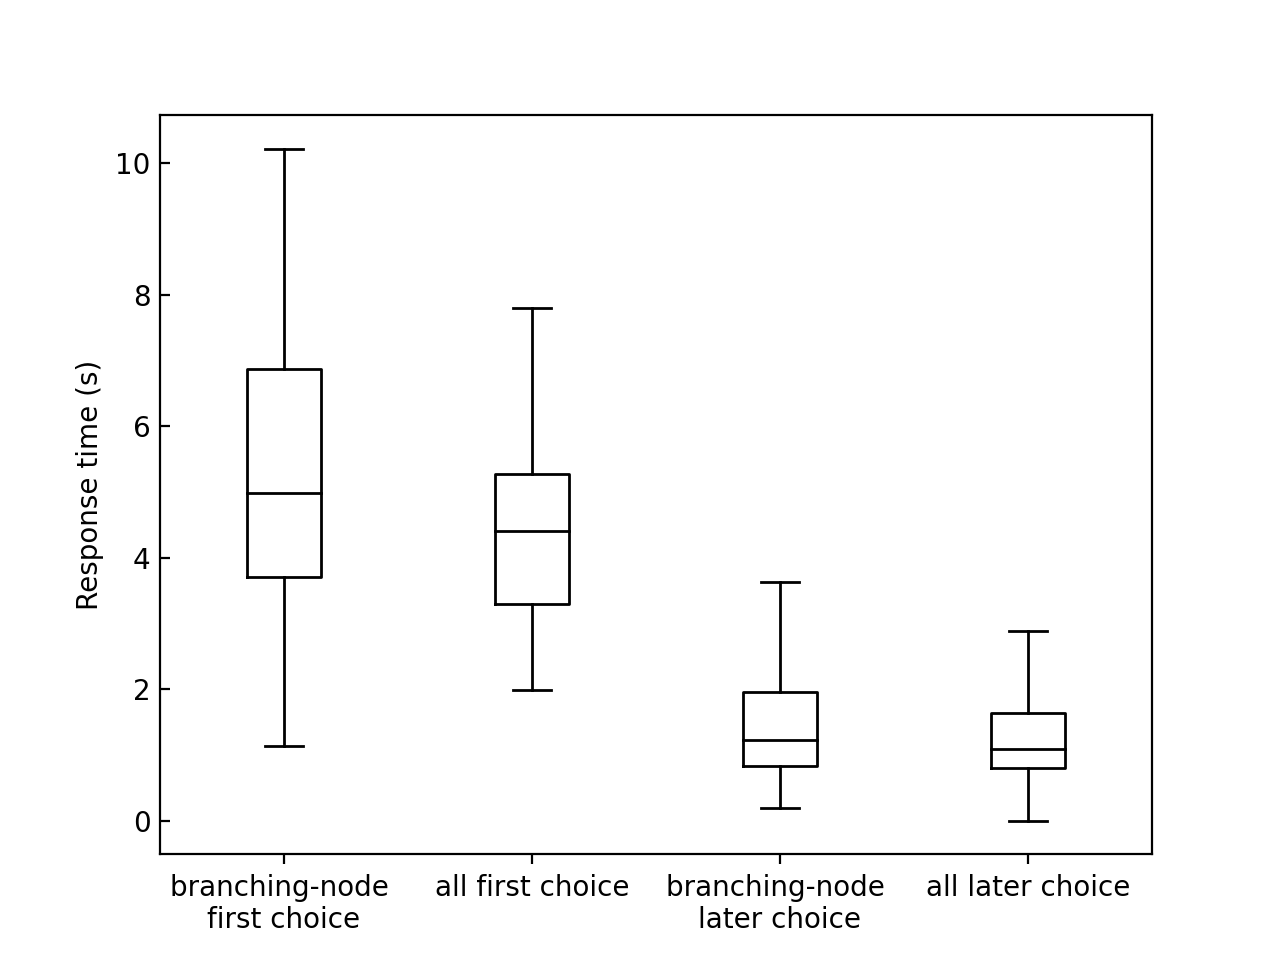

In [49]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.boxplot([RT_start_sub/1000, RT_start_nobranch_sub/1000,
                 RT_notstart['RT']/1000, RT_notstart_nobranch['RT']/1000],
                 
   positions =[1,2,3,4],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #
#--------------------------------------
axs.set_xticks([1,2,3,4])
axs.set_xticklabels(labels = ['branching-node \nfirst choice','all first choice','branching-node \nlater choice','all later choice'])#,fontsize=18
axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
#fig.savefig(out_dir + 'undo_RT.png', dpi=600, bbox_inches='tight')